#Preparacion Entorno

Nos conectamos a la fuente de dastos de googlr drive

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Creamos una carpeta la cual sera nuestro directorio de trabajo y asi posteriormente almacenar los archivos relacionados

In [ ]:
import os

# Crear una carpeta llamada 'archivos_cargados' si no existe
folder_name = "/content/drive/My Drive/Coding_Dojo-Curso_Data _Science/TecnicoCore"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

print(f"Carpeta '{folder_name}' creada en el entorno de Colab.")

Carpeta '/content/drive/My Drive/Coding_Dojo-Curso_Data _Science/TecnicoCore' creada en el entorno de Colab.


Cargamos el CSV con los datos relacionados al modelo de manera automatica en la carpeta creada

In [ ]:
from google.colab import files

# Cargar archivos desde tu máquina
uploaded = files.upload()

# Guardar los archivos cargados en la carpeta creada
for file_name in uploaded.keys():
    with open(os.path.join(folder_name, file_name), 'wb') as f:
        f.write(uploaded[file_name])

print(f"Los archivos han sido guardados en la carpeta '{folder_name}'")

Saving train.csv to train.csv
Los archivos han sido guardados en la carpeta '/content/drive/My Drive/Coding_Dojo-Curso_Data _Science/TecnicoCore'


In [ ]:
import pandas as pd
ruta = "/content/drive/MyDrive/Coding_Dojo-Curso_Data _Science/TecnicoCore/train.csv"
pd.options.display.max_columns=0
df= pd.read_csv(ruta)


#EDA

Se inicia analizando nuestro conjuntos de datos con la visualizacion de las 5 primeras filas



In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Vemos que hay varias presencia de nulos en dos variables principales en una numerica que es Age y otra Categorica que es Cabin que para efectos practicos no aporta informacion relevante para un modelo de clasificación. Por ende las Age y la otra variable nula Embarked la completaremos en el preprocesing.

Procedemos a revisar duplicados

In [ ]:
df.duplicated().sum()

0

no hay presencia de duplicados


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Al analizar los valores vemos que todos estan dentro de norma


Revision de las variables Categoricas

In [ ]:
df['Sex'].value_counts()

,count
Sex,
male,577
female,314


In [ ]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [ ]:
df['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


Variables Discretas

In [ ]:
df['SibSp'].value_counts()

,count
SibSp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


In [ ]:
df['Parch'].value_counts()

,count
Parch,
0,678
1,118
2,80
5,5
3,5
4,4
6,1


Ahora como implementaremos un modelo de clasificacion necesitamos de una columna categorica como target en este caso usaremos los datos si son utiles para definir si sobrevive o no una persona en el titanic

In [ ]:
df=df[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked' ]]

Ahora que tenemos nuestro data frame totalmente armado podemos proceder a realizar el analisis

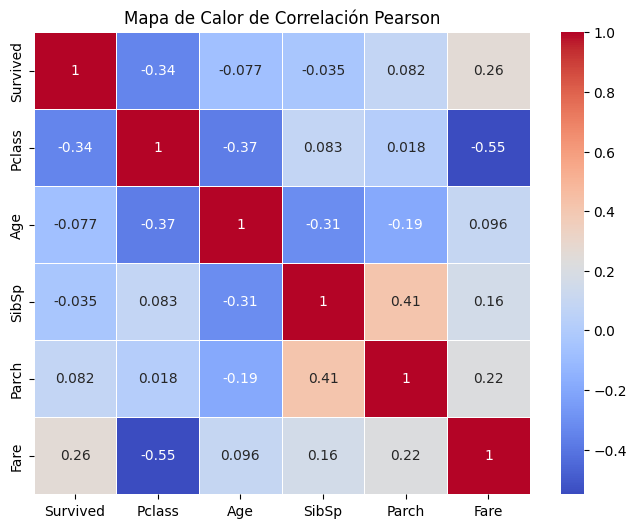

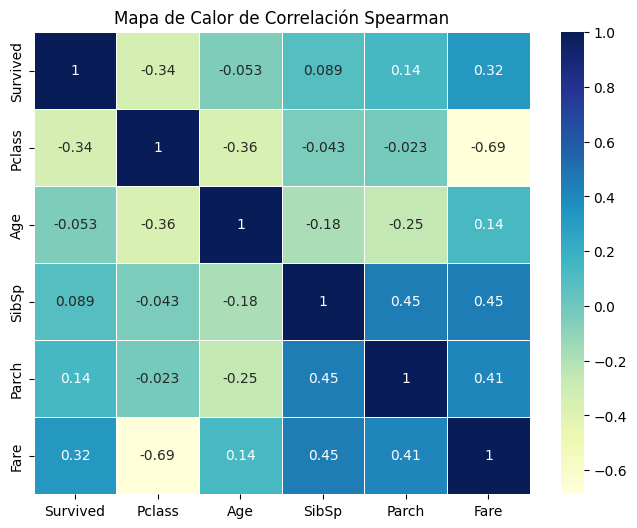

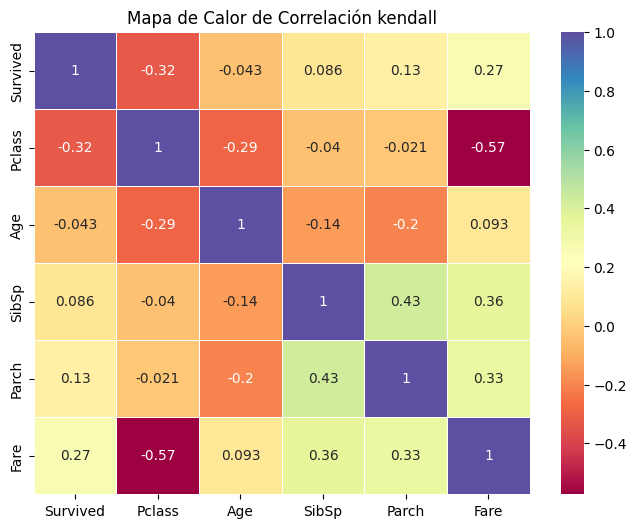

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Seleccionar solo las columnas numéricas
numeric_df = df.select_dtypes(exclude= ["object"])
# Calcular la correlación
corr_matrix = numeric_df.corr(method="pearson")
spearman_corr= numeric_df.corr(method="spearman")
kendall_corr= numeric_df.corr(method="kendall")
# Crear un mapa de calor Pearson
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Mapa de Calor de Correlación Pearson")
plt.show()
# Crear un mapa de calor Spearman
plt.figure(figsize=(8, 6))
sns.heatmap(spearman_corr, annot=True, cmap="YlGnBu", linewidths=0.5)
plt.title("Mapa de Calor de Correlación Spearman")
plt.show()
# Crear un mapa de calor kendall
plt.figure(figsize=(8, 6))
sns.heatmap(kendall_corr, annot=True, cmap="Spectral", linewidths=0.5)
plt.title("Mapa de Calor de Correlación kendall")
plt.show()

Para nuestro de modelo de clasificacion no es mucho lo que podemos desprender de este analisis multivariados dado que nos indica las correlaciones entre las variables numericas, si nos sirve entender como se comportan una respecto a la otra impactando en el resultado final.

Luego hacemos un analisis univariados para ver la existencias de outliers

In [ ]:
numeric_df.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

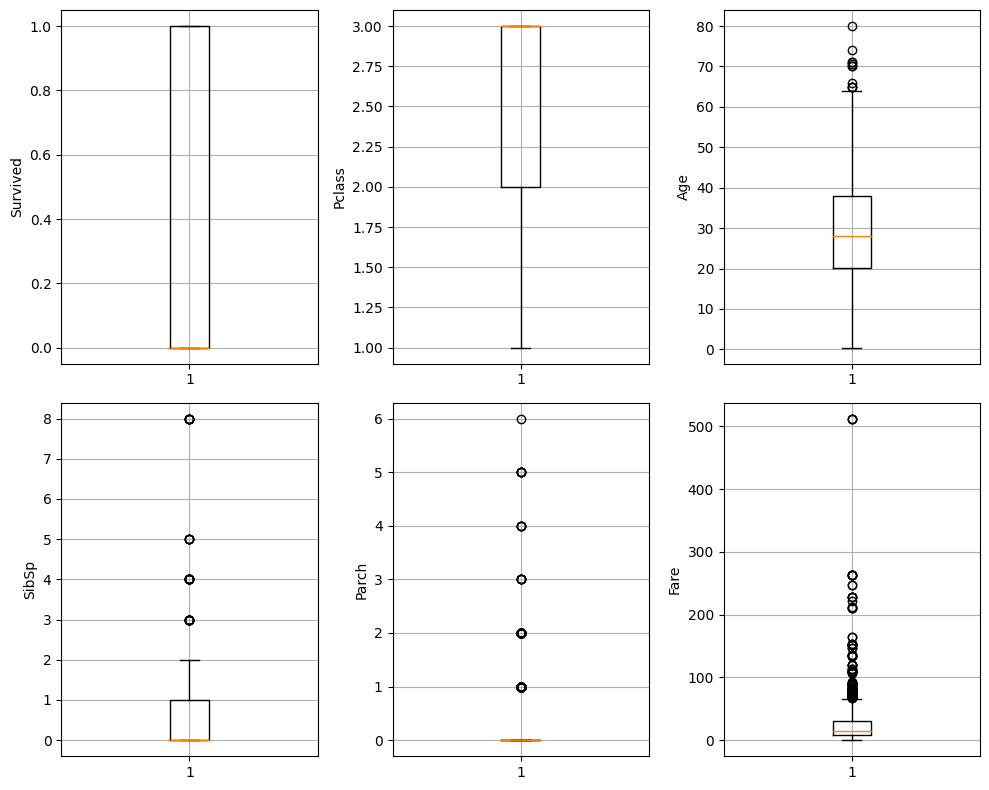

In [ ]:
columnas =numeric_df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].columns
df2=df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
n=1
plt.figure(figsize=(10,8),dpi=100)
for columna in columnas:
    plt.subplot(2,3,n)
    n=n+1
    plt.ylabel(columna)
    plt.boxplot(df[columna].dropna())
    plt.grid(True)
    plt.tight_layout()

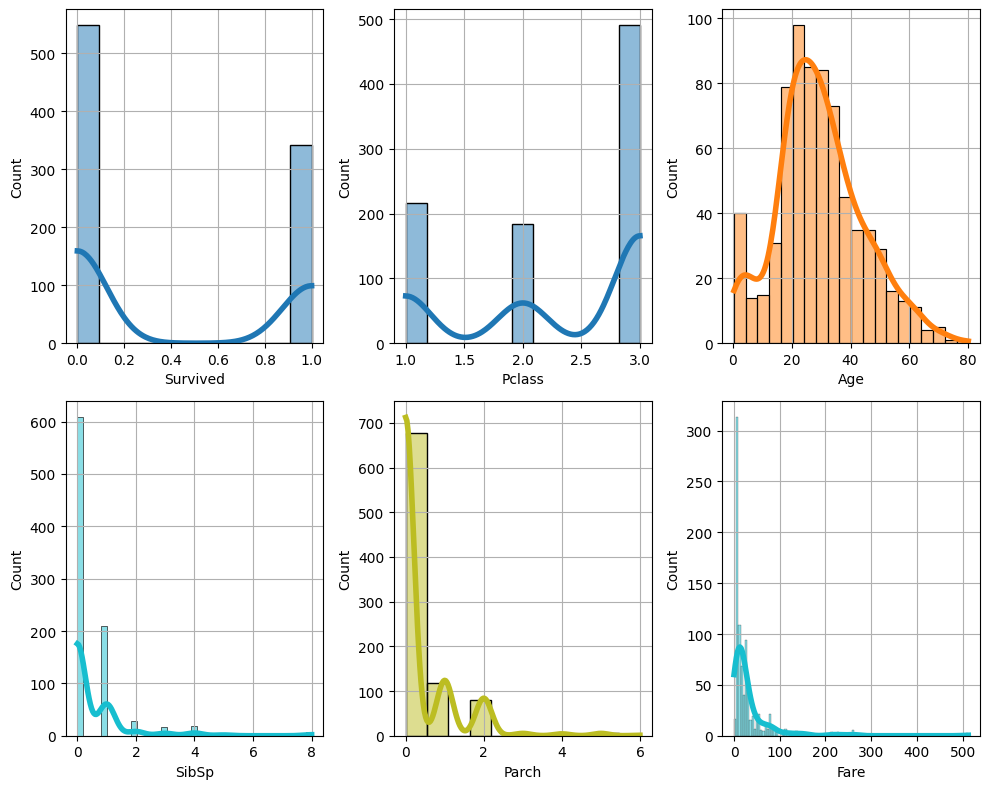

In [ ]:
import random
n=1
plt.figure(figsize=(10,8),dpi=100)
for columna in columnas:
    plt.subplot(2,3,n)
    n=n+1
    sns.histplot(df2, x=columna, stat='count',kde=True, color=random.choice(sns.color_palette()),line_kws={'linewidth':4})
    plt.grid(True)
    plt.tight_layout()

En este caso vemos gran cantidad de datos outliers en las columnas numericas en las cuales  posteriormente evaluaremos si corresponde o no eliminarlos. Adicionalmente en lo que respecta a las distribuciones vemos que no se repite una tendcia, pero en cuanto a la edad vemos una casi distribucion normal mientras que para parch y Fare es una distribucion log normal.

#Preprocesamiento

Importamos nuestras librerias

In [ ]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder,MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, RocCurveDisplay, auc
import numpy as np

Separamos nuestra variable target del data set

In [ ]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [ ]:
    X = df.drop('Survived', axis = 'columns')
    y = df['Survived'].reset_index(drop=True)


Luego creamos nuesto pipeline haciendo los column transformer para variables numericas y categoricas en donde en este caso como las variables son nominales le aplicaremos onehotenconder y adicionalmente tenmos variables discretas usaremos el simple imputer usando el valor mas frecuente en caso de haber nulos en dichos tipos de variables.

In [ ]:
#columnas numericas
variables_num =['Age','Fare']
num_transformer = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="mean")),
        ("scaler",StandardScaler())
    ]
)
variables_dis = ['SibSp','Parch']
dis_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),  # Imputación
        ("dis_scaler",  MinMaxScaler())
    ]
)

variables_cat = ['Sex','Pclass','Embarked']
cat_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),  # Imputación
        ("onehot",  OneHotEncoder(handle_unknown="ignore"))  # Codificación categorica
    ]
)

#se incluye un columntransformer para agrupar todas las transformaciones realizadas
preprocessor = ColumnTransformer(
    transformers=[
        ("num",num_transformer,variables_num),
        ("dis",dis_transformer,variables_dis),
        ("cat",cat_transformer,variables_cat)
    ] ,remainder='passthrough'
)

pipeline_logi = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LogisticRegression(class_weight='balanced', random_state=55))
])
pipeline_knn= Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", KNeighborsClassifier(n_neighbors=2))
])

pipeline_tree = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", DecisionTreeClassifier(class_weight='balanced', random_state=55, max_depth=10))
])

pipeline_xgb = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", XGBClassifier(class_weight='balanced', random_state=55, max_depth=10))
])

pipeline_lgbm = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LGBMClassifier(class_weight='balanced', random_state=55, max_depth=10))
])



Creamos nuestras variables de test y entrenamiento con un 30% para test y un 70% train

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=55)

In [ ]:
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [58]:
pipeline_logi.fit(X_train, y_train)
pipeline_knn.fit(X_train, y_train)
pipeline_tree.fit(X_train, y_train)
pipeline_xgb.fit(X_train, y_train)
pipeline_lgbm.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:19:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 232, number of negative: 391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000268 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 172
[LightGBM] [Info] Number of data points in the train set: 623, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('dis',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('dis_scaler',
                                                                   MinMaxScaler())]),
                                                  ['SibSp', 'Parch']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex', 'Pclass',
                                                   'Embarked'])])),
                ('model',
                 LGBMClassifier(class_weight='balanced', max_depth=10,
                                random_state=55))])

In [ ]:
y_pred_logi = pipeline_logi.predict(X_test)
y_pred_knn = pipeline_knn.predict(X_test)
y_pred_tree = pipeline_tree.predict(X_test)
y_pred_xgb = pipeline_xgb.predict(X_test)
y_pred_lgbm = pipeline_lgbm.predict(X_test)

## Benchmark

In [ ]:
predicciones = [y_pred_logi, y_pred_knn, y_pred_tree, y_pred_xgb, y_pred_lgbm]
modelos = ['Logistic Regression', 'KNN Classifier', 'Decision Tree', 'XGBoost', 'LightGBM']

Classification report for Logistic Regression
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       158
           1       0.71      0.72      0.71       110

    accuracy                           0.76       268
   macro avg       0.75      0.75      0.75       268
weighted avg       0.76      0.76      0.76       268

Accuracy: 0.7611940298507462
Precision: 0.7619098873763053
Recall: 0.7611940298507462
F1 Score: 0.7615092038516319
ROC AUC Score: 0.7546605293440737



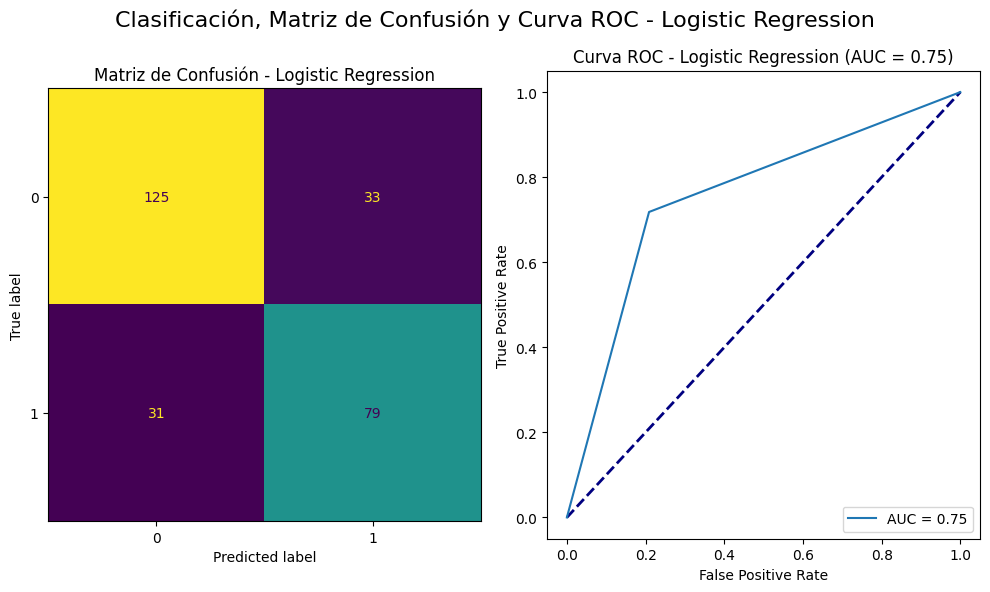

Classification report for KNN Classifier
              precision    recall  f1-score   support

           0       0.75      0.93      0.83       158
           1       0.85      0.55      0.66       110

    accuracy                           0.77       268
   macro avg       0.80      0.74      0.75       268
weighted avg       0.79      0.77      0.76       268

Accuracy: 0.7723880597014925
Precision: 0.7867769538665434
Recall: 0.7723880597014925
F1 Score: 0.7603689590333291
ROC AUC Score: 0.7379171461449942



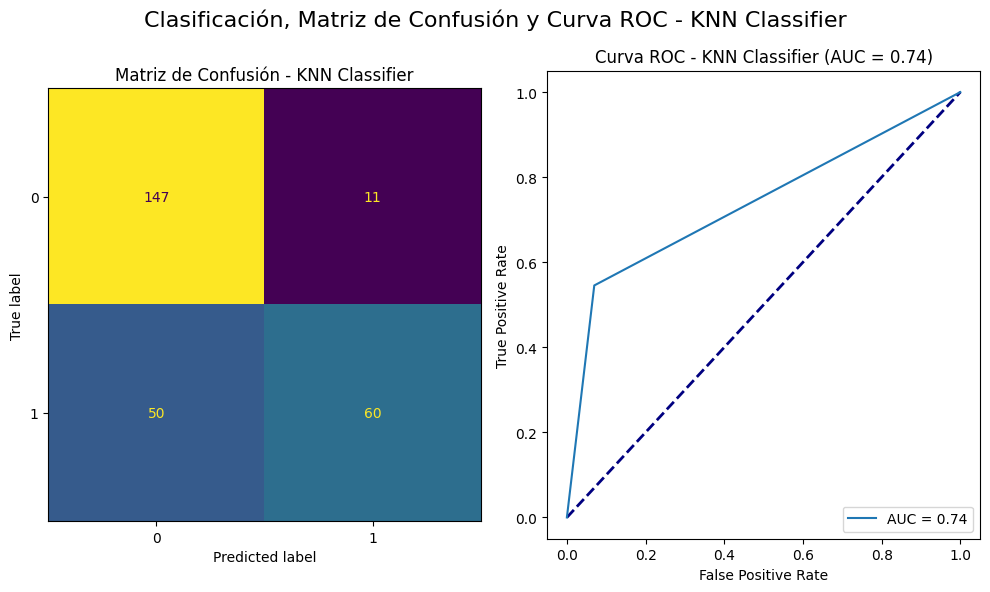

Classification report for Decision Tree
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       158
           1       0.75      0.75      0.75       110

    accuracy                           0.79       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.79      0.79      0.79       268

Accuracy: 0.7947761194029851
Precision: 0.7945089336078823
Recall: 0.7947761194029851
F1 Score: 0.7946312687029398
ROC AUC Score: 0.7872842347525892



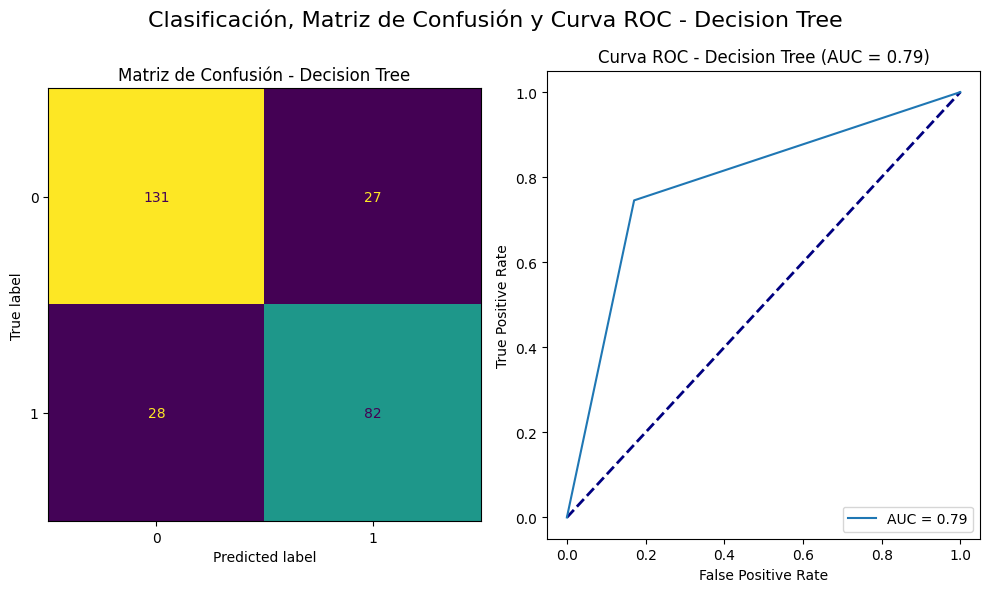

Classification report for XGBoost
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       158
           1       0.80      0.70      0.75       110

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.79       268
weighted avg       0.81      0.81      0.80       268

Accuracy: 0.8059701492537313
Precision: 0.8056537805160245
Recall: 0.8059701492537313
F1 Score: 0.8034926866110754
ROC AUC Score: 0.789873417721519



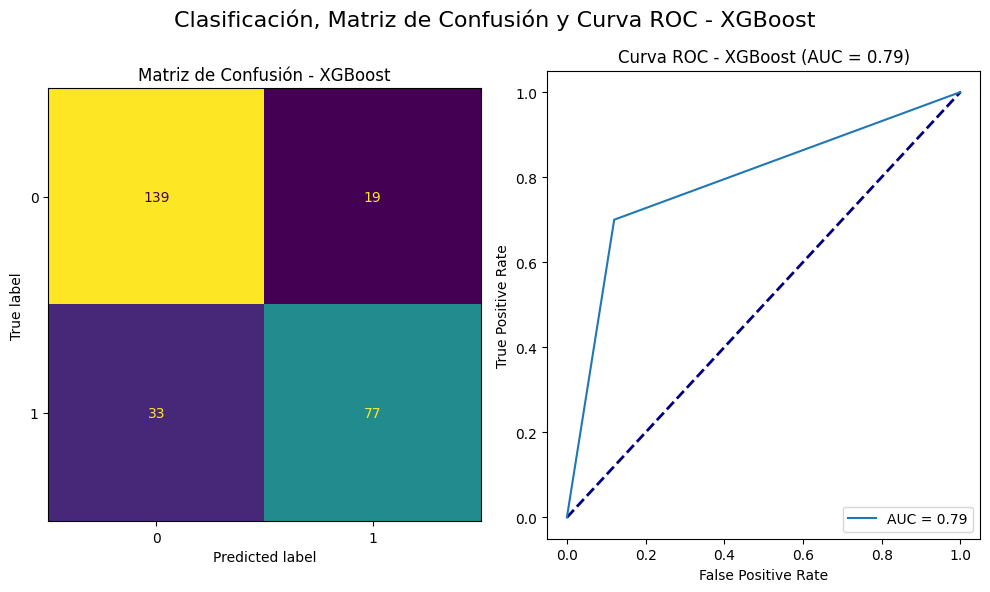

Classification report for LightGBM
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       158
           1       0.80      0.73      0.76       110

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268

Accuracy: 0.8134328358208955
Precision: 0.8126332622601279
Recall: 0.8134328358208955
F1 Score: 0.8118522200565969
ROC AUC Score: 0.8003452243958573



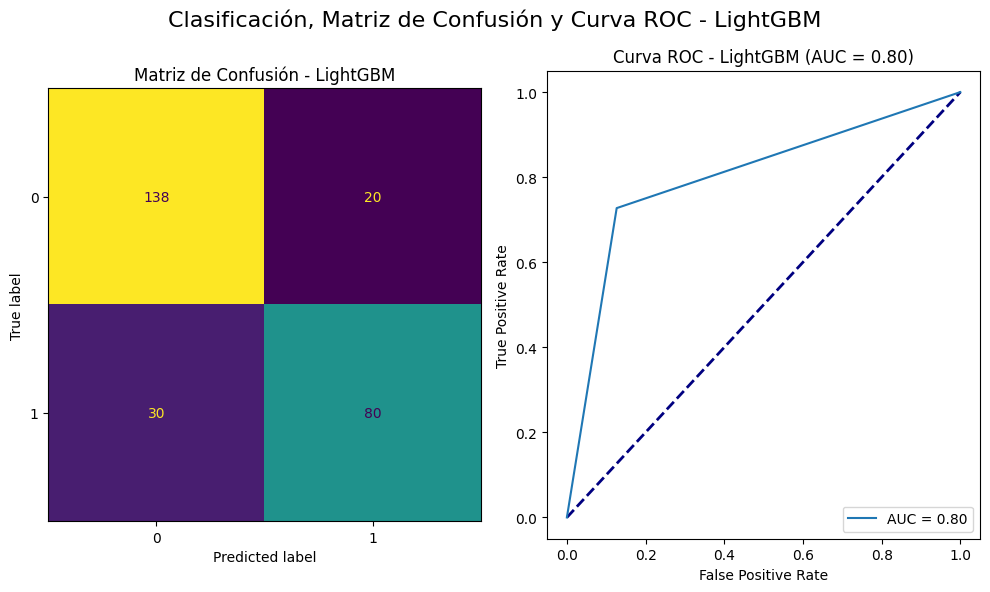

In [ ]:
for i, y_pred in enumerate(predicciones):
    fig, axs = plt.subplots(1, 2, figsize=(10, 6))  # Cambié a 3 subplots
    print(f"Classification report for {modelos[i]}")
    print(classification_report(y_test, y_pred))  # Informe de clasificación

    # Mostrar matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
    cm_display.plot(ax=axs[0], colorbar=False)
    axs[0].set_title(f'Matriz de Confusión - {modelos[i]}')

    # Curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
    axs[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Línea diagonal
    roc_display.plot(ax=axs[1])
    axs[1].set_title(f'Curva ROC - {modelos[i]} (AUC = {roc_auc:.2f})')

    # Métricas adicionales
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))  # Usar weighted si es multiclase
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))  # Usar weighted si es multiclase
    print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))  # Usar weighted si es multiclase
    print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
    print("")

    # Título general para la fila
    plt.suptitle(f'Clasificación, Matriz de Confusión y Curva ROC - {modelos[i]}', fontsize=16)

    plt.tight_layout()
    plt.show()



Al comparar todos los modelos podemos obtener como resultados preliminares el que el modelo de LightGBM es el modelo que se comporta para predecir si un pasajero sobrevive o muere en el accidente del titanic ya que su curva es del 0.8

## Preparacion de datos sin outlier

Se utilizara el codigo [en este link](https://www.kaggle.com/code/ksvmuralidhar/creating-custom-transformers-using-scikit-learn) que nos muestra como crear un clase que permite remover outliers

In [ ]:
from sklearn.base import BaseEstimator,TransformerMixin
class OutlierRemover(BaseEstimator,TransformerMixin):
    def __init__(self,factor=1.5):
        self.factor = factor

    def outlier_removal(self,X,y=None):
        X = pd.Series(X).copy()
        q1 = X.quantile(0.25)
        q3 = X.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (self.factor * iqr)
        upper_bound = q3 + (self.factor * iqr)
        X.loc[((X < lower_bound) | (X > upper_bound))] = np.nan
        return pd.Series(X)

    def fit(self,X,y=None):
        return self

    def transform(self,X,y=None):
        return X.apply(self.outlier_removal)

In [ ]:
outlier_remover = OutlierRemover()

In [ ]:
outlier_remover.get_params()

{'factor': 1.5}

In [ ]:
numeric_df2 = X[['Age','Fare']].reset_index(drop=True)
obj_df2=X[['Sex','Pclass','Embarked','SibSp','Parch']]

In [ ]:
ct = ColumnTransformer(transformers=[['outlier_remover',OutlierRemover(factor=1.5),list(range(numeric_df2.shape[1]))]],remainder='passthrough')

In [ ]:
data_without_outliers = pd.DataFrame(ct.fit_transform(numeric_df2),columns=numeric_df2.columns).reset_index(drop=True)

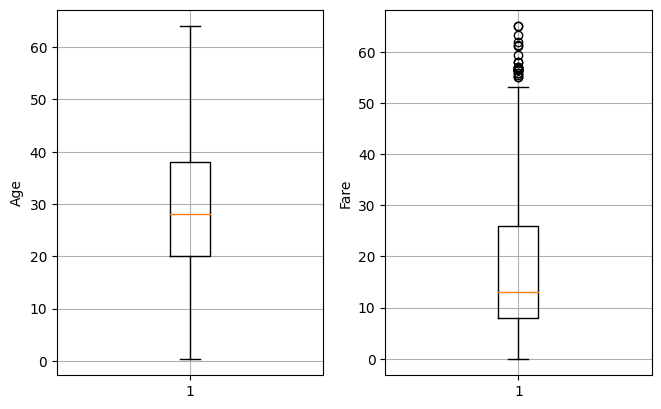

In [53]:
columnas =['Age','Fare']
df2=data_without_outliers
n=1
plt.figure(figsize=(10,8),dpi=100)
for columna in columnas:
    plt.subplot(2,3,n)
    n=n+1
    plt.ylabel(columna)
    plt.boxplot(data_without_outliers[columna].dropna())
    plt.grid(True)
plt.tight_layout()
plt.show()

Vemos que los digramas de caja se  muestran de mejor manera sin tanto outlier.

In [54]:
data_without_outliers.isnull().sum()

,0
Age,188
Fare,116


In [55]:
X_without= pd.concat([data_without_outliers, obj_df2],axis=1)

In [56]:
X_without.isnull().sum()

,0
Age,188
Fare,116
Sex,0
Pclass,0
Embarked,2
SibSp,0
Parch,0


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_without, y, test_size=0.3, random_state=55)

In [59]:
pipeline_logi.fit(X_train, y_train)
pipeline_knn.fit(X_train, y_train)
pipeline_tree.fit(X_train, y_train)
pipeline_xgb.fit(X_train, y_train)
pipeline_lgbm.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:20:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 232, number of negative: 391
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 172
[LightGBM] [Info] Number of data points in the train set: 623, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('dis',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('dis_scaler',
                                                                   MinMaxScaler())]),
                                                  ['SibSp', 'Parch']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex', 'Pclass',
                                                   'Embarked'])])),
                ('model',
                 LGBMClassifier(class_weight='balanced', max_depth=10,
                                random_state=55))])

In [60]:
y_pred_logi = pipeline_logi.predict(X_test)
y_pred_knn = pipeline_knn.predict(X_test)
y_pred_tree = pipeline_tree.predict(X_test)
y_pred_xgb = pipeline_xgb.predict(X_test)
y_pred_lgbm = pipeline_lgbm.predict(X_test)

## Benchmark sin Outliers

Classification report for Logistic Regression
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       158
           1       0.71      0.72      0.71       110

    accuracy                           0.76       268
   macro avg       0.75      0.75      0.75       268
weighted avg       0.76      0.76      0.76       268

Accuracy: 0.7611940298507462
Precision: 0.7619098873763053
Recall: 0.7611940298507462
F1 Score: 0.7615092038516319
ROC AUC Score: 0.7546605293440737



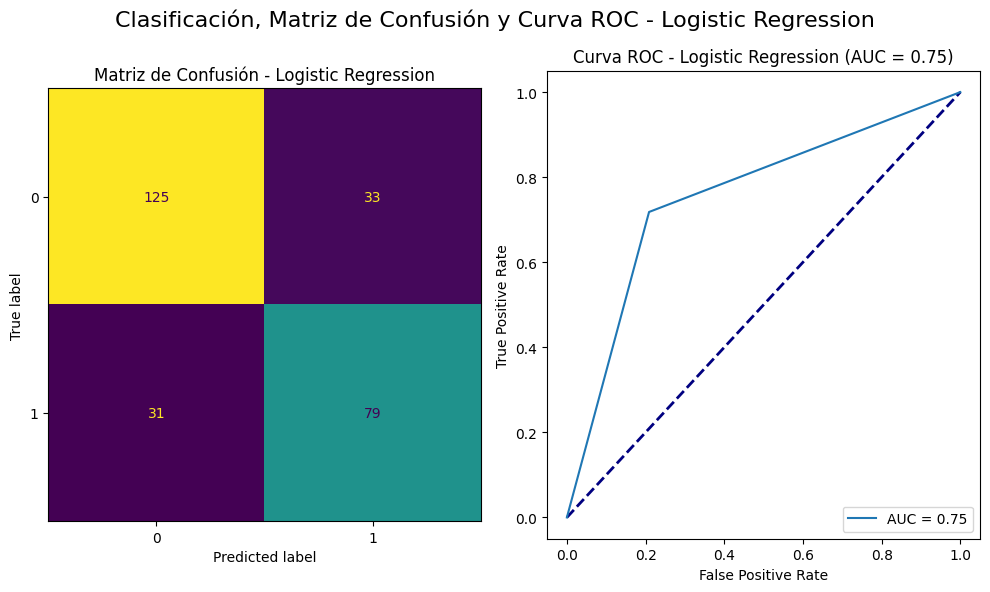

Classification report for KNN Classifier
              precision    recall  f1-score   support

           0       0.75      0.93      0.83       158
           1       0.85      0.55      0.66       110

    accuracy                           0.77       268
   macro avg       0.80      0.74      0.75       268
weighted avg       0.79      0.77      0.76       268

Accuracy: 0.7723880597014925
Precision: 0.7867769538665434
Recall: 0.7723880597014925
F1 Score: 0.7603689590333291
ROC AUC Score: 0.7379171461449942



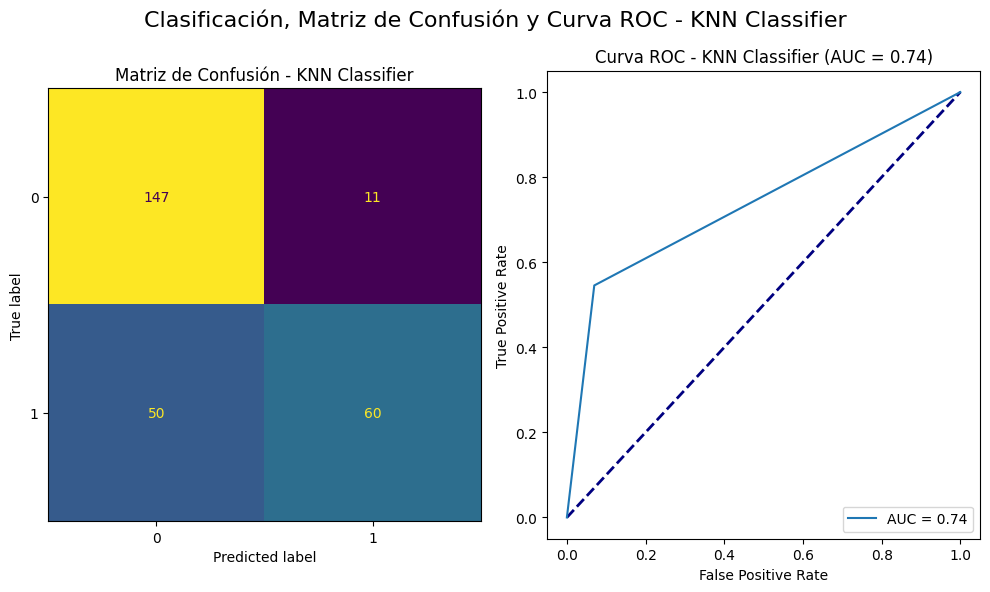

Classification report for Decision Tree
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       158
           1       0.75      0.75      0.75       110

    accuracy                           0.79       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.79      0.79      0.79       268

Accuracy: 0.7947761194029851
Precision: 0.7945089336078823
Recall: 0.7947761194029851
F1 Score: 0.7946312687029398
ROC AUC Score: 0.7872842347525892



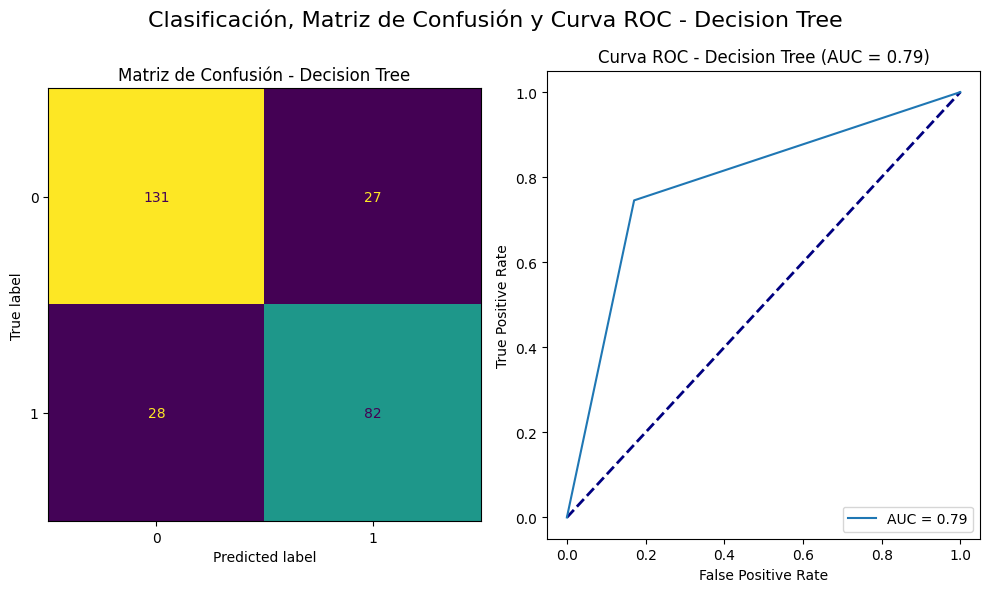

Classification report for XGBoost
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       158
           1       0.80      0.70      0.75       110

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.79       268
weighted avg       0.81      0.81      0.80       268

Accuracy: 0.8059701492537313
Precision: 0.8056537805160245
Recall: 0.8059701492537313
F1 Score: 0.8034926866110754
ROC AUC Score: 0.789873417721519



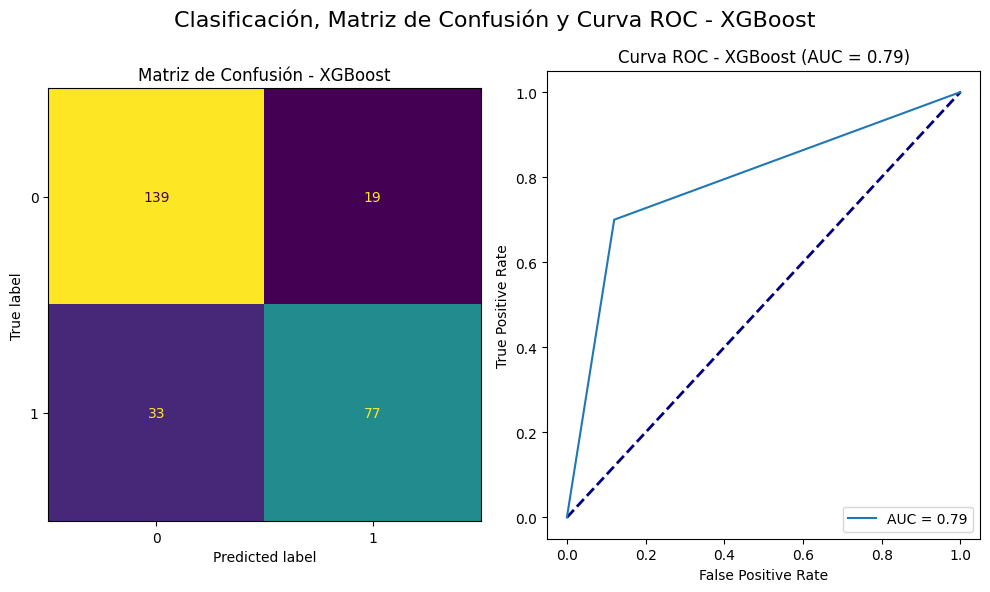

Classification report for LightGBM
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       158
           1       0.80      0.73      0.76       110

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268

Accuracy: 0.8134328358208955
Precision: 0.8126332622601279
Recall: 0.8134328358208955
F1 Score: 0.8118522200565969
ROC AUC Score: 0.8003452243958573



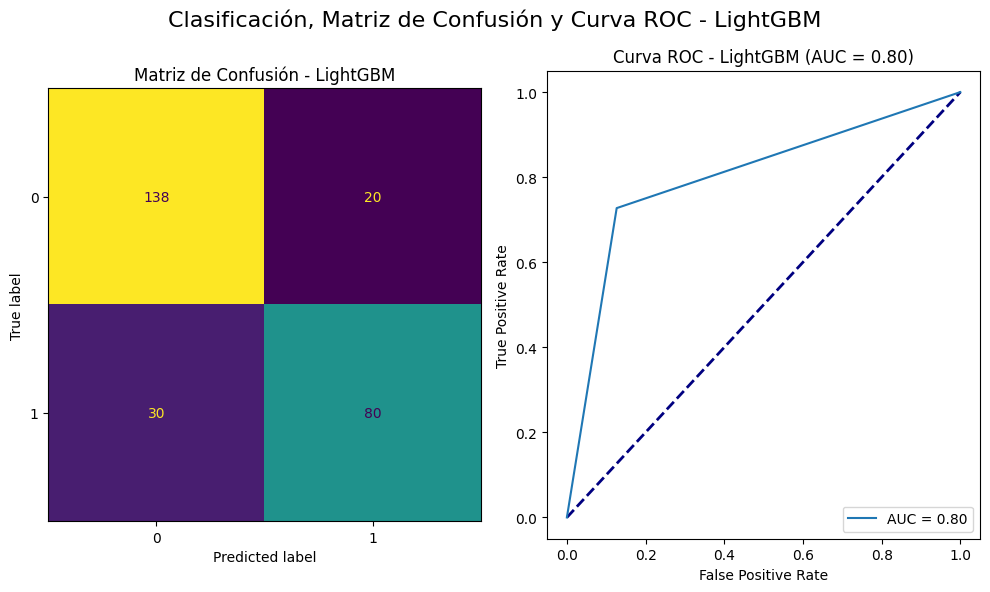

In [61]:
for i, y_pred in enumerate(predicciones):
    fig, axs = plt.subplots(1, 2, figsize=(10, 6))  # Cambié a 3 subplots
    print(f"Classification report for {modelos[i]}")
    print(classification_report(y_test, y_pred))  # Informe de clasificación

    # Mostrar matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
    cm_display.plot(ax=axs[0], colorbar=False)
    axs[0].set_title(f'Matriz de Confusión - {modelos[i]}')

    # Curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
    axs[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Línea diagonal
    roc_display.plot(ax=axs[1])
    axs[1].set_title(f'Curva ROC - {modelos[i]} (AUC = {roc_auc:.2f})')

    # Métricas adicionales
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))  # Usar weighted si es multiclase
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))  # Usar weighted si es multiclase
    print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))  # Usar weighted si es multiclase
    print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
    print("")

    # Título general para la fila
    plt.suptitle(f'Clasificación, Matriz de Confusión y Curva ROC - {modelos[i]}', fontsize=16)

    plt.tight_layout()
    plt.show()


AL sacar outlier vemos que realmente no se modifican los resultados por ende no es un parametros que sea necesario evaluar ya que nos quitara tiempo de procesamiento ya que si el cambio hubiese sido significativo si se consideraria.

#Usar GridSearchCV

Ahora usaremos Grid Search para testear los hiperparametros y asi encontrar posiblemente una combinacion con mejores resultados

In [63]:
from sklearn.model_selection import GridSearchCV

In [62]:
num_transformer = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="mean")),
        ("scaler",StandardScaler())
    ]
)

dis_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),  # Imputación
        ("dis_scaler",  MinMaxScaler())
    ]
)

cat_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),  # Imputación
        ("onehot",  OneHotEncoder(handle_unknown="ignore"))  # Codificación categorica
    ]
)

#se incluye un columntransformer para agrupar todas las transformaciones realizadas
preprocessor = ColumnTransformer(
    transformers=[
        ("num",num_transformer,variables_num),
        ("dis",dis_transformer,variables_dis),
        ("cat",cat_transformer,variables_cat)
    ] ,remainder='passthrough'
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LGBMClassifier())  # Modelo inicial
])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=55)


In [64]:
param_grid = [

    {
        'preprocessor__num__imputer__strategy': ['mean', 'median', 'most_frequent'],
        'preprocessor__dis__imputer__strategy': ['median', 'most_frequent'],
        'model': [LogisticRegression()],
        'model__penalty': ['l1','l2','elasticent'], #Tipo de regularización a aplicar.
        'model__solver': ['newton-cg', 'lbfgs', 'saga'], #Algoritmo para optimizar la función de pérdida.
        'model__max_iter': [100,200,300], #Número máximo de iteraciones para los algoritmos de optimización.
    },
    {
        'preprocessor__num__imputer__strategy': ['mean', 'median', 'most_frequent'],
        'preprocessor__dis__imputer__strategy': ['median', 'most_frequent'],
        'model': [DecisionTreeClassifier()],
        'model__max_depth': [10, 20, 30],  # Parámetros para Árbol de Decisión
        'model__min_samples_split': [2, 10, 20],
        'model__min_samples_leaf': [1, 5, 10]
    },
    {
        'preprocessor__num__imputer__strategy': ['mean', 'median', 'most_frequent'],
        'preprocessor__dis__imputer__strategy': ['median', 'most_frequent'],
        'model': [KNeighborsClassifier()],
        'model__n_neighbors': [ 2, 3, 4],  #Número de vecinos a utilizar.
        'model__weights': ['uniform','distance'], #Función para ponderar los vecinos.
    },
    {
        'preprocessor__num__imputer__strategy': ['mean', 'median', 'most_frequent'],
        'preprocessor__dis__imputer__strategy': ['median', 'most_frequent'],
        'model': [XGBClassifier()], #Parametros XGBClasifier
        'model__max_depth': [10, 20, 30],
        'model__n_estimators': [100,200],
        'model__learning_rate': [0.01, 0.1, 0.2]
    },
    {
        'preprocessor__num__imputer__strategy': ['mean', 'median', 'most_frequent'],
        'preprocessor__dis__imputer__strategy': ['median', 'most_frequent'],
        'model': [LGBMClassifier()],#Parametros LGBMClasifier
        'model__max_depth': [10, 20, 30],
        'model__n_estimators': [100,200]
    }
]

In [65]:
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

# Diccionario con varias métricas de evaluación
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='binary'),
    'recall': make_scorer(recall_score, average='binary'),
    'f1': make_scorer(f1_score, average='binary'),
    'roc_auc': 'roc_auc'
}

# Usar GridSearchCV con múltiples métricas de evaluación
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    scoring=scoring,
    refit='accuracy',  # Escoge el mejor modelo en función de accuracy
    cv=5,  # Número de folds de validación cruzada
    return_train_score=False
)

# Ajustar el modelo
grid_search.fit(X_train, y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Se han truncado las últimas 5000 líneas del flujo de salida.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 185, number of negative: 313
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000113 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 176
[LightGBM] [I

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
450 fits failed out of a total of 2520.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/pyth

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Fare']),
                                                                        ('dis',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('dis_scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['SibSp',
                                                                          'Parch']),
                                                                        ('cat',
                                                                         Pipe...
                          'preprocessor__dis__imputer__strategy': ['median',
                                                                   'most_frequent'],
                          'preprocessor__num__imputer__strategy': ['mean',
                                                                   'median',
                                                                   'most_frequent']}],
             refit='accuracy',
             scoring={'accuracy': 'accuracy',
                      'f1': make_scorer(f1_score, average=binary),
                      'precision': make_scorer(precision_score, average=binary),
                      'recall': make_scorer(recall_score, average=binary),
                      'roc_auc': 'roc_auc'})

In [66]:
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor puntuación:", grid_search.best_score_)

Mejores parámetros: {'model': DecisionTreeClassifier(), 'model__max_depth': 10, 'model__min_samples_leaf': 1, 'model__min_samples_split': 10, 'preprocessor__dis__imputer__strategy': 'median', 'preprocessor__num__imputer__strategy': 'mean'}
Mejor puntuación: 0.8298967741935485


In [89]:
cvres = grid_search.cv_results_

In [90]:
print(cvres.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_model', 'param_model__max_iter', 'param_model__penalty', 'param_model__solver', 'param_preprocessor__dis__imputer__strategy', 'param_preprocessor__num__imputer__strategy', 'param_model__max_depth', 'param_model__min_samples_leaf', 'param_model__min_samples_split', 'param_model__n_neighbors', 'param_model__weights', 'param_model__learning_rate', 'param_model__n_estimators', 'params', 'split0_test_accuracy', 'split1_test_accuracy', 'split2_test_accuracy', 'split3_test_accuracy', 'split4_test_accuracy', 'mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy', 'split0_test_precision', 'split1_test_precision', 'split2_test_precision', 'split3_test_precision', 'split4_test_precision', 'mean_test_precision', 'std_test_precision', 'rank_test_precision', 'split0_test_recall', 'split1_test_recall', 'split2_test_recall', 'split3_test_recall', 'split4_test_recall', 'mean_test_recall', 'std_test_recall',

In [95]:

for values in zip(cvres['params'],cvres['mean_test_accuracy'], cvres['mean_test_roc_auc'],cvres['rank_test_accuracy'],cvres['rank_test_roc_auc']):
    print(values)

({'model': LogisticRegression(), 'model__max_iter': 100, 'model__penalty': 'l1', 'model__solver': 'newton-cg', 'preprocessor__dis__imputer__strategy': 'median', 'preprocessor__num__imputer__strategy': 'mean'}, nan, nan, 415, 415)
({'model': LogisticRegression(), 'model__max_iter': 100, 'model__penalty': 'l1', 'model__solver': 'newton-cg', 'preprocessor__dis__imputer__strategy': 'median', 'preprocessor__num__imputer__strategy': 'median'}, nan, nan, 415, 415)
({'model': LogisticRegression(), 'model__max_iter': 100, 'model__penalty': 'l1', 'model__solver': 'newton-cg', 'preprocessor__dis__imputer__strategy': 'median', 'preprocessor__num__imputer__strategy': 'most_frequent'}, nan, nan, 415, 415)
({'model': LogisticRegression(), 'model__max_iter': 100, 'model__penalty': 'l1', 'model__solver': 'newton-cg', 'preprocessor__dis__imputer__strategy': 'most_frequent', 'preprocessor__num__imputer__strategy': 'mean'}, nan, nan, 415, 415)
({'model': LogisticRegression(), 'model__max_iter': 100, 'mode

In [67]:
#mejor modelo de la muestra
best_model = grid_search.best_estimator_

Luego usamos grid para comparar los modelos variando diferentes paramatros hasta llegar el mejor resultado posible que nos indica que es el Decision Tree con una profundida de 10  con minimos de 1 ejemplo por hoja, y minimo 10 ejemplos por division, además en vez de usar el mas frecuente cambia por la mediana, resultando una puntuacion de 0,83 respecto a los 0,81 de accuracy que se tenian con el modelo LGBM en la fase preliminar.

#Validacion Cruzada

In [84]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
# Realizar la validación cruzada con múltiples métricas
cv_results = cross_validate(best_model, X_train, y_train, cv=50, scoring=scoring, return_train_score=False)

# Mostrar los resultados
print("Resultados de la validación cruzada:")
for metric in scoring.keys():
    print(f"\n{metric}:")
    print(f"  Media de las pruebas: {cv_results['test_' + metric].mean()}")
    print(f"  Desviación estándar de las pruebas: {cv_results['test_' + metric].std()}")



Resultados de la validación cruzada:

accuracy:
  Media de las pruebas: 0.815
  Desviación estándar de las pruebas: 0.11666673710902353

precision:
  Media de las pruebas: 0.7961428571428572
  Desviación estándar de las pruebas: 0.17999489158787932

recall:
  Media de las pruebas: 0.7209999999999998
  Desviación estándar de las pruebas: 0.2188812463414808

f1:
  Media de las pruebas: 0.7350562770562769
  Desviación estándar de las pruebas: 0.17585050195194124

roc_auc:
  Media de las pruebas: 0.8294910714285715
  Desviación estándar de las pruebas: 0.12751620576530895


Classification Report
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       158
           1       0.77      0.66      0.71       110

    accuracy                           0.78       268
   macro avg       0.78      0.76      0.77       268
weighted avg       0.78      0.78      0.78       268



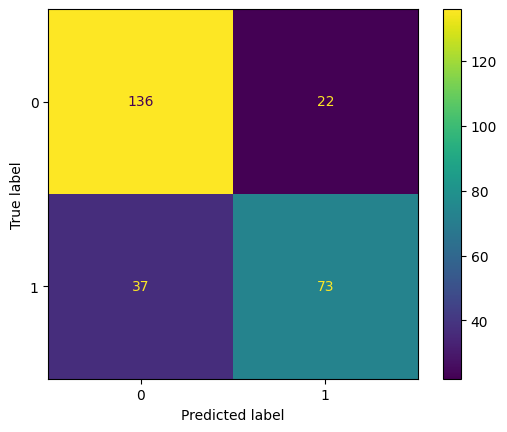

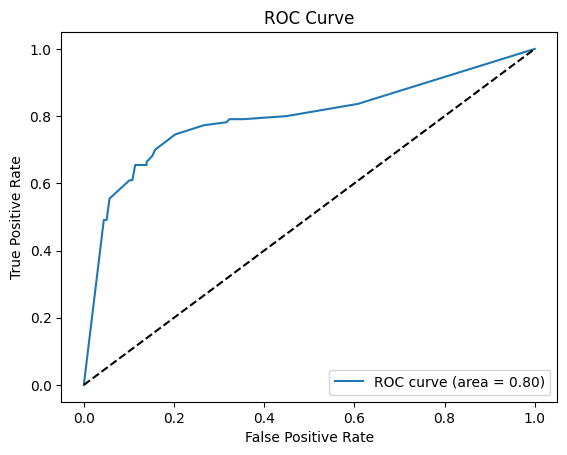

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=55)
# Ajustar el mejor modelo a los datos completos
best_model.fit(X_train, y_train)



# Hacer predicciones
y_pred = best_model.predict(X_test)

# Reporte de clasificación
print("Classification Report")
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Curva ROC
y_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Al analizar nuestro modelo en detalle el elegido logra mejorar el accuracy pero las probabildades de clasificar correctamente un valor no son mucho mejor que los escenarios planteados. Aparte si entendemos la clase target esta desbalanceadas y por más que usemos algunos herramientas de balanceo nos dara resultados con ciertos sesgo ya que el comparar modelos por accuracy como pide la tarea de competencia  no es la manera más correcta, por ende es mejor usar el AUC y con eso seria nuestro modelo de LGBM el mejor en AUC, ya que con eso nos aseguramos de reducir los errores de tipo 1 y tipo 2 siguiendo con un accuracy casi similar.